In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Load raw data
wti = pd.read_csv('../data/raw/wti/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv', parse_dates=['Date'])
brent = pd.read_csv('../data/raw/brent/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv', parse_dates=['Date'])

In [3]:
wti.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-07 00:00:00-04:00,40.680000,40.950001,39.900002,40.619999,256596,0.0,0.0
1,2020-07-08 00:00:00-04:00,40.480000,41.080002,40.299999,40.900002,286740,0.0,0.0
2,2020-07-09 00:00:00-04:00,40.869999,40.990002,39.270000,39.619999,367386,0.0,0.0
3,2020-07-10 00:00:00-04:00,39.580002,40.770000,38.540001,40.549999,393149,0.0,0.0
4,2020-07-13 00:00:00-04:00,40.349998,40.720001,39.470001,40.099998,370715,0.0,0.0


In [4]:
# Keep Date and Close price
wti = wti[['Date', 'Close']]
brent = brent[['Date', 'Close']]

In [5]:
wti.head()

,Date,Close
0,2020-07-07 00:00:00-04:00,40.619999
1,2020-07-08 00:00:00-04:00,40.900002
2,2020-07-09 00:00:00-04:00,39.619999
3,2020-07-10 00:00:00-04:00,40.549999
4,2020-07-13 00:00:00-04:00,40.099998


In [6]:
# Strip the time and timezone from the Date column
wti['Date'] = pd.to_datetime(wti['Date'], utc=True).dt.date
brent['Date'] = pd.to_datetime(brent['Date'], utc=True).dt.date

In [7]:
wti.head()

,Date,Close
0,2020-07-07,40.619999
1,2020-07-08,40.900002
2,2020-07-09,39.619999
3,2020-07-10,40.549999
4,2020-07-13,40.099998


In [8]:
# Remove any duplicate dates
wti = wti[~wti.index.duplicated(keep='last')]
brent = brent[~brent.index.duplicated(keep='last')]

In [9]:
wti.head()

,Date,Close
0,2020-07-07,40.619999
1,2020-07-08,40.900002
2,2020-07-09,39.619999
3,2020-07-10,40.549999
4,2020-07-13,40.099998


In [10]:
# Ensure prices are floats, not strings
wti['Close'] = pd.to_numeric(wti['Close'], errors='coerce')
brent['Close'] = pd.to_numeric(brent['Close'], errors='coerce')

In [11]:
wti.head()

,Date,Close
0,2020-07-07,40.619999
1,2020-07-08,40.900002
2,2020-07-09,39.619999
3,2020-07-10,40.549999
4,2020-07-13,40.099998


In [12]:
brent.head()

,Date,Close
0,2020-07-07,43.080002
1,2020-07-08,43.290001
2,2020-07-09,42.349998
3,2020-07-10,43.240002
4,2020-07-13,42.720001


halt

In [13]:
wti.set_index('Date', inplace=True)
brent.set_index('Date', inplace=True)

wti.sort_index(inplace=True)
brent.sort_index(inplace=True)

In [15]:
wti.head()

,Close
Date,
2020-07-07,40.619999
2020-07-08,40.900002
2020-07-09,39.619999
2020-07-10,40.549999
2020-07-13,40.099998


In [19]:
# Convert the index to datetime64
wti.index = pd.to_datetime(wti.index)
brent.index = pd.to_datetime(brent.index)

In [24]:
wti.loc["2020-07-07"]

Close    40.619999
Name: 2020-07-07 00:00:00, dtype: float64

In [25]:
# Combine date ranges
all_dates = pd.date_range(
    start=min(wti.index.min(), brent.index.min()),
    end=max(wti.index.max(), brent.index.max()),
    freq='B'  # Business days only
)

# Reindex and forward-fill missing values
wti_aligned = wti.reindex(all_dates).ffill()
brent_aligned = brent.reindex(all_dates).ffill()

In [26]:
wti.head()

,Close
Date,
2020-07-07,40.619999
2020-07-08,40.900002
2020-07-09,39.619999
2020-07-10,40.549999
2020-07-13,40.099998


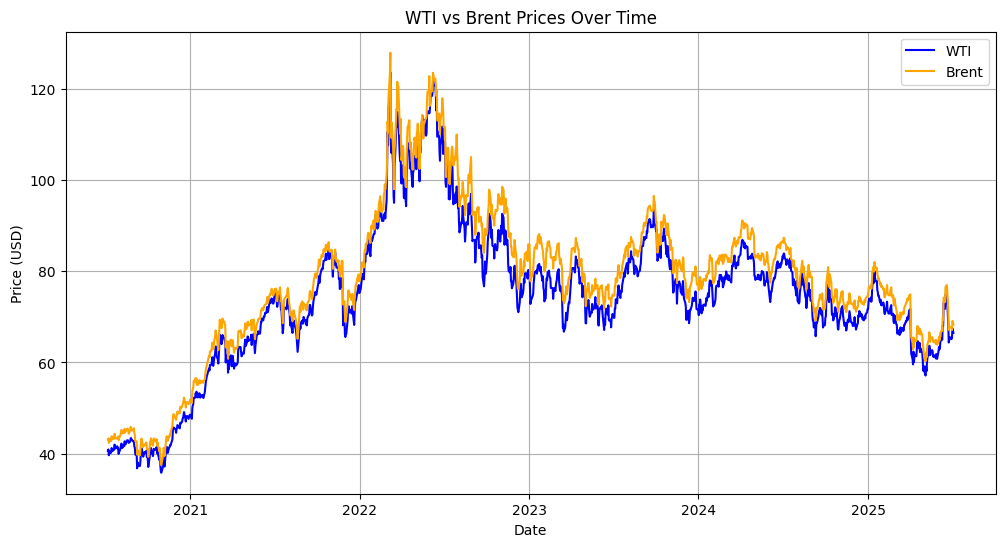

In [ ]:
# Plot time-series data to enaure not irregularities
plt.figure(figsize=(12, 6))
plt.plot(wti_aligned.index, wti_aligned['Close'], label='WTI', color='blue')
plt.plot(brent_aligned.index, brent_aligned['Close'], label='Brent', color='orange')
plt.title('WTI vs Brent Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Create directories if they do not exist
os.makedirs('../data/processed/wti/yfinance', exist_ok=True)
os.makedirs('../data/processed/brent/yfinance', exist_ok=True)

# Save to CSV
wti_aligned.to_csv('../data/processed/wti/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv')
brent_aligned.to_csv('../data/processed/brent/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv')

# Save to CSV
wti_aligned.to_csv('../data/processed/wti/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv')
brent_aligned.to_csv('../data/processed/brent/yfinance/_1d_2020-07-07_to_2025-07-07_prices.csv')